# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Preprossesing dataset**

In [ ]:
# ID file dari Google Drive (di antara “/d/” dan “/view” pada tautan)
file_id = "1_HDFsgN3qfbWDC9LAz7WgQw7EoouJL1j"
# atau URL
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

output = "flood.csv"  # nama file lokal hasil unduhan
df.head(20)



,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
5,6,6,6,4,6,4,3,1,3,5,...,10,5,9,5,5,7,3,3,2,0.470
6,6,7,4,5,5,5,4,8,8,4,...,8,4,5,4,7,7,5,4,8,0.570
7,7,3,5,5,6,6,6,7,6,5,...,4,6,9,7,10,6,5,4,5,0.585
8,6,3,5,4,5,11,3,2,9,7,...,2,8,7,5,4,9,6,5,7,0.580
9,4,3,5,6,2,3,7,7,10,4,...,7,6,5,6,7,5,7,4,8,0.555


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
missing_value = df.isnull().sum()
print(f"Jumlah missing value di seluruh kolom: \n{missing_value}")

Jumlah missing value di seluruh kolom: 
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
# Mengecek baris yang duplikat di seluruh kolom
duplicate_rows = df.duplicated()

# Menghitung jumlah baris yang duplikat
num_duplicate_rows = duplicate_rows.sum()

print(f"Jumlah baris duplikat di seluruh kolom: {num_duplicate_rows}")

# Jika Anda ingin melihat baris yang duplikat:
# display(df[duplicate_rows])

Jumlah baris duplikat di seluruh kolom: 0


# **Modeling**

In [ ]:
X = df.drop(columns=["FloodProbability"])  # fitur
y = df["FloodProbability"]                 # target (probabilitas banjir)

#Data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ================================================
# 1. Model 1: Linear Regression
# ================================================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("\n📌 Hasil Linear Regression")
print("MAE  :", mean_absolute_error(y_test, y_pred_lin))
print("MSE  :", mean_squared_error(y_test, y_pred_lin))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2   :", r2_score(y_test, y_pred_lin))

# ================================================
# 2. Model 2: Random Forest Regressor
# ================================================
rf_reg = RandomForestRegressor(
    n_estimators=100, random_state=42
)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

print("\n📌 Hasil Random Forest Regressor")
print("MAE  :", mean_absolute_error(y_test, y_pred_rf))
print("MSE  :", mean_squared_error(y_test, y_pred_rf))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2   :", r2_score(y_test, y_pred_rf))



📌 Hasil Linear Regression
MAE  : 9.200418205068672e-17
MSE  : 1.4017688507228059e-32
RMSE : 1.1839631965237795e-16
R2   : 1.0

📌 Hasil Random Forest Regressor
MAE  : 0.02049824000000001
MSE  : 0.0006737141275000004
RMSE : 0.025956003688934866
R2   : 0.7294957103200914


### Visualisasi Hasil Pemodelan

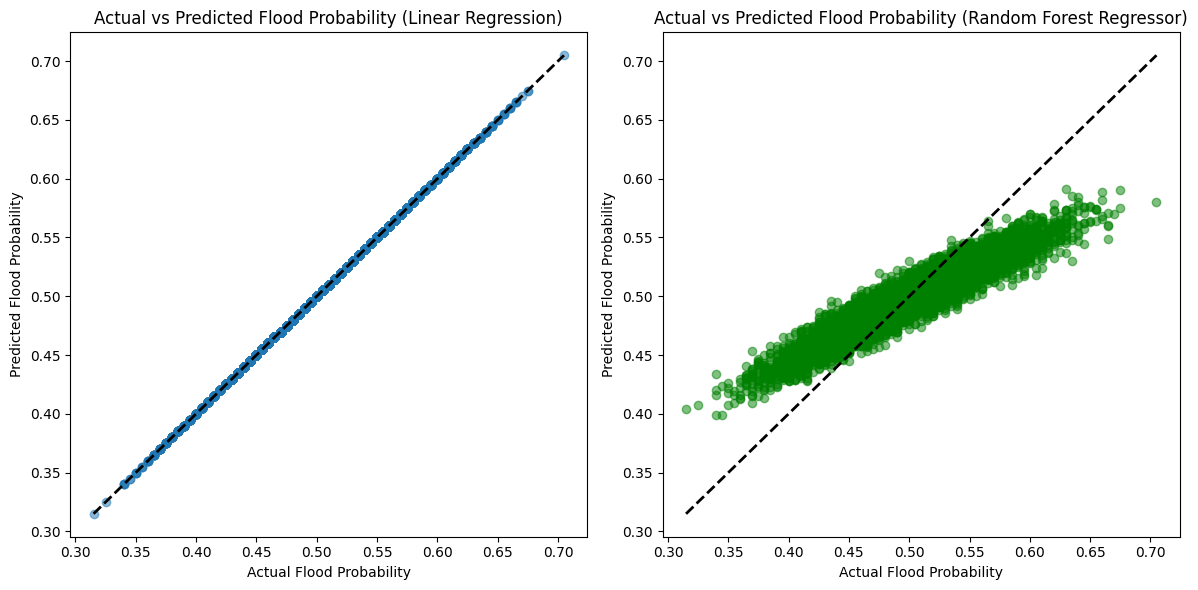

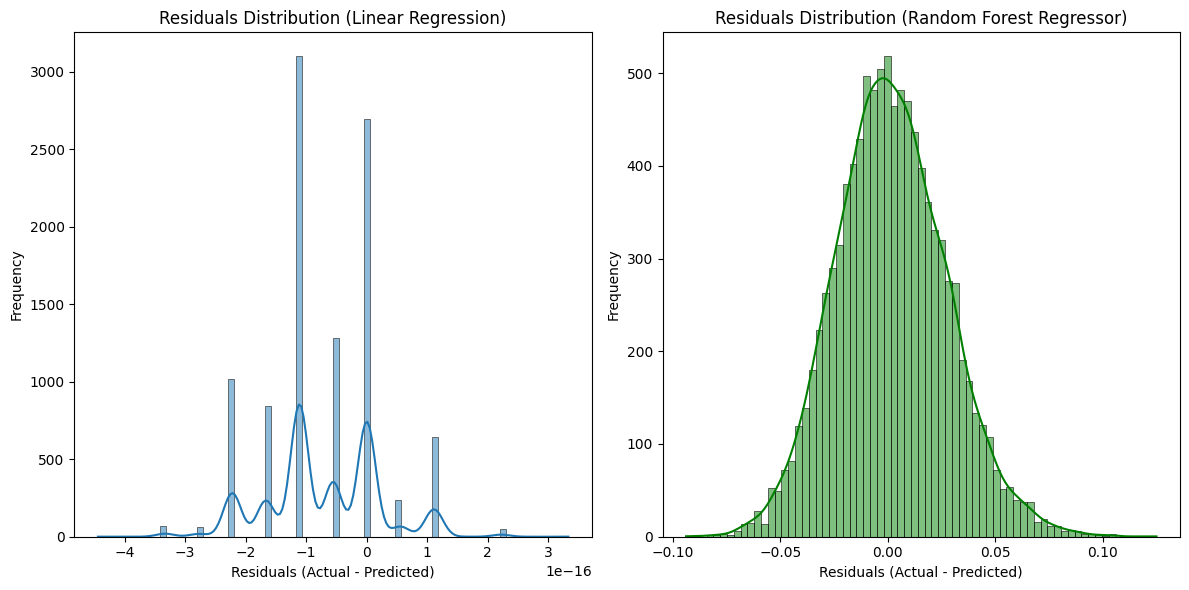

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot untuk Linear Regression
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.title('Actual vs Predicted Flood Probability (Linear Regression)')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line

# Scatter plot untuk Random Forest Regressor
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.title('Actual vs Predicted Flood Probability (Random Forest Regressor)')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line

plt.tight_layout()
plt.show()

# Visualisasi distribusi error (residuals)
plt.figure(figsize=(12, 6))

# Histogram of residuals for Linear Regression
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_lin, kde=True)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')

# Histogram of residuals for Random Forest Regressor
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_rf, kde=True, color='green')
plt.title('Residuals Distribution (Random Forest Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Feature Importance dari Random Forest Regressor

Feature Importances (Random Forest Regressor):


,Feature,Importance
1,TopographyDrainage,0.053020
6,DamsQuality,0.052789
19,PoliticalFactors,0.052384
10,IneffectiveDisasterPreparedness,0.051635
16,PopulationScore,0.051615
2,RiverManagement,0.051396
13,Landslides,0.050995
8,AgriculturalPractices,0.050673
15,DeterioratingInfrastructure,0.050642
14,Watersheds,0.050545


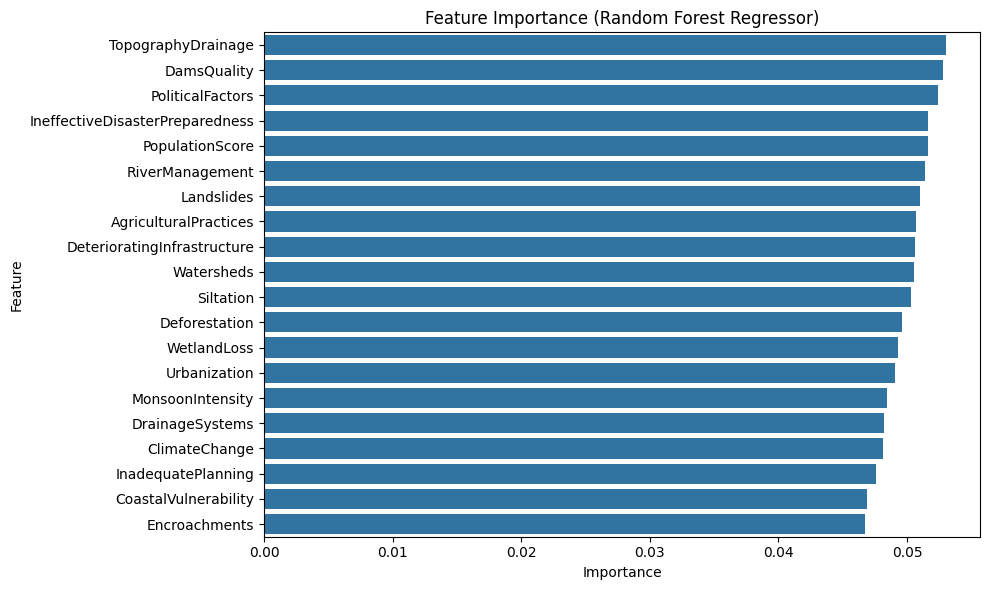

In [ ]:
# Mendapatkan feature importances dari model Random Forest
feature_importances = rf_reg.feature_importances_

# Membuat Series untuk memudahkan visualisasi
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan kepentingannya
features_df = features_df.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print("Feature Importances (Random Forest Regressor):")
display(features_df)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()